In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import xgboost

from functions import make_dataset

from functions import make_portfolio

from sklearn.utils import shuffle

import time

import pickle

In [2]:
import pympler

In [202]:
features2 = pd.read_pickle("training_sets/features2")

In [203]:
features3 = pd.read_pickle("training_sets/features3")

In [204]:
features2 = features2.append(features3)

In [205]:
del features3

In [3]:
Date2 = np.load("training_sets/Date2.npy", allow_pickle = True)
Date3 = np.load("training_sets/Date3.npy", allow_pickle = True)

In [4]:
Dates = np.append(Date2, Date3)

In [208]:
def make_dataset_eval_with_extra_return_40_term_from_periods(df, training_period, prediction_period, cols, pred_col, return_col):
    
    
    X_train = shuffle(df.loc[training_period, np.append(cols, pred_col)])
    X_train = X_train.replace([np.inf, -np.inf], np.NaN)
    X_train = X_train.dropna(axis = 0)

    Y_train = X_train.pop(pred_col)
    
    
    
    X_test = shuffle(df.loc[prediction_period, np.append(cols, return_col)])
    X_test = X_test.replace([np.inf, -np.inf], np.NaN)
    X_test = X_test.dropna(axis = 0)
    
    Y_return_40 = X_test.pop(return_col)
    
    return X_train, X_test, Y_train, Y_return_40

In [9]:
def make_dataset_eval_with_extra_return_40_term_from_periods_for_regression(df, training_period, prediction_period, cols, return_col):
    
    
    X_train = shuffle(df.loc[training_period, np.append(cols, return_col)])
    X_train = X_train.replace([np.inf, -np.inf], np.NaN)
    X_train = X_train.dropna(axis = 0)

    Y_train_return_40 = X_train.pop(return_col)
    
    
    
    X_test = shuffle(df.loc[prediction_period, np.append(cols, return_col)])
    X_test = X_test.replace([np.inf, -np.inf], np.NaN)
    X_test = X_test.dropna(axis = 0)
    
    Y_test_return_40 = X_test.pop(return_col)
    
    return X_train, X_test, Y_train_return_40, Y_test_return_40

In [10]:
def return_40_metric(pred, labels):


    return np.mean(labels[np.argsort(pred)[:500]]), (1-np.sort(pred)[499]), np.mean(labels[np.argsort(pred)[:100]]), (1-np.sort(pred)[99]), np.mean(labels[np.argsort(pred)[:20]]), (1-np.sort(pred)[19])

In [11]:
def return_40_metric_for_regression(pred, labels):


    return np.mean(labels[np.argsort(pred)[-500:]]), np.sort(pred)[-500], np.mean(labels[np.argsort(pred)[-100:]]), np.sort(pred)[-100], np.mean(labels[np.argsort(pred)[-20:]]), np.sort(pred)[-20]

In [12]:
class my_callback(xgboost.callback.TrainingCallback):
    
    def __init__(self, xgeval, Y_eval_return_40, results_eval):
        self.eval_mine = xgeval
        self.eval_return_40 = Y_eval_return_40
        self.results_eval_mine = results_eval
        
        
    def after_iteration(self, model, epoch, evals_log):
            

        predictions_eval = model.predict(self.eval_mine)

        self.results_eval_mine.append(return_40_metric(model.predict(self.eval_mine), self.eval_return_40))    
        
                 
            
        return False

In [13]:
class my_callback_regression(xgboost.callback.TrainingCallback):
    
    def __init__(self, xgeval, Y_eval_return_40, results_eval):
        self.eval_mine = xgeval
        self.eval_return_40 = Y_eval_return_40
        self.results_eval_mine = results_eval
        
        
    def after_iteration(self, model, epoch, evals_log):
            

        predictions_eval = model.predict(self.eval_mine)

        self.results_eval_mine.append(return_40_metric_for_regression(model.predict(self.eval_mine), self.eval_return_40))    
        
                   
        return False

In [ ]:
"""
pick 10 random col trials of size between 6 and 30
pick random date index between 200 and len(Dates) - 50

create dataset using unique cols of the 10 trials:

then for i in cols_trials[:5]:
    binary loglogloss
    
then for i in cols_trials[5:]:



"""

In [223]:
params1 = {
  'colsample_bynode': 0.6,
    'colsample_bytree' : 0.6,
    'colsample_bylevel' : 0.5,
  'learning_rate': 0.3,
  'max_depth': 3,
  'num_parallel_tree': 100,
  'objective': 'binary:logistic',
  'subsample': 0.9,
  'tree_method': 'gpu_hist',
    "verbosity" : 0,
    "lambda" : 1,
    "alpha" : 0
}

In [15]:
params2 = {
  'colsample_bynode': 0.6,
    'colsample_bytree' : 0.6,
    'colsample_bylevel' : 0.5,
  'learning_rate': 0.3,
  'max_depth': 3,
  'num_parallel_tree': 100,
  'objective': 'reg:squarederror',
  'subsample': 0.9,
  'tree_method': 'gpu_hist',
    "verbosity" : 0,
    "lambda" : 1,
    "alpha" : 0
}

In [12]:
from pympler.asizeof import asizeof

In [16]:
columns_to_choose_from = features2.columns[:-11]

In [13]:
asizeof(results)

65735088

In [14]:
65735088 / 10**6

65.735088

In [5]:
with open("ColSearch/results.pkl", "rb") as f:
    results = pickle.load(f)

In [2]:
with open("ColSearch/results_reg.pkl", "rb") as f:
    results_reg = pickle.load(f)

In [ ]:
"""
0 is cols
1 is train len
2 is test len
3 is data (20 x 6) use [:,4] for 20 portfolio
4 is weight
5 is gain
6 is cover

"""

In [ ]:
"""
comparing reg vs binary
"""

In [86]:
results_data = []
reg_data = []
for j in range(len(results)):
    for col_indx in range(1, 5):
        results_data.append(np.array(results[j][col_indx][3])[:,4])
        reg_data.append(np.array(results_reg[j][col_indx][3])[:,4])

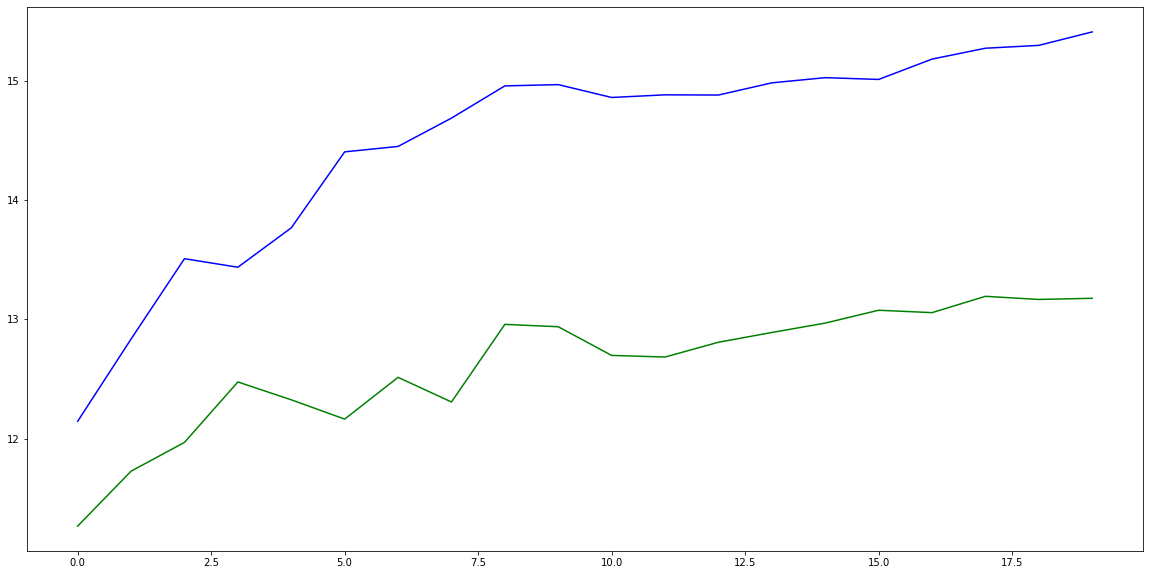

In [87]:
plt.figure(figsize = (20, 10))
plt.plot(np.mean(results_data, axis = 0), "b")
plt.plot(np.mean(reg_data, axis = 0), "g")

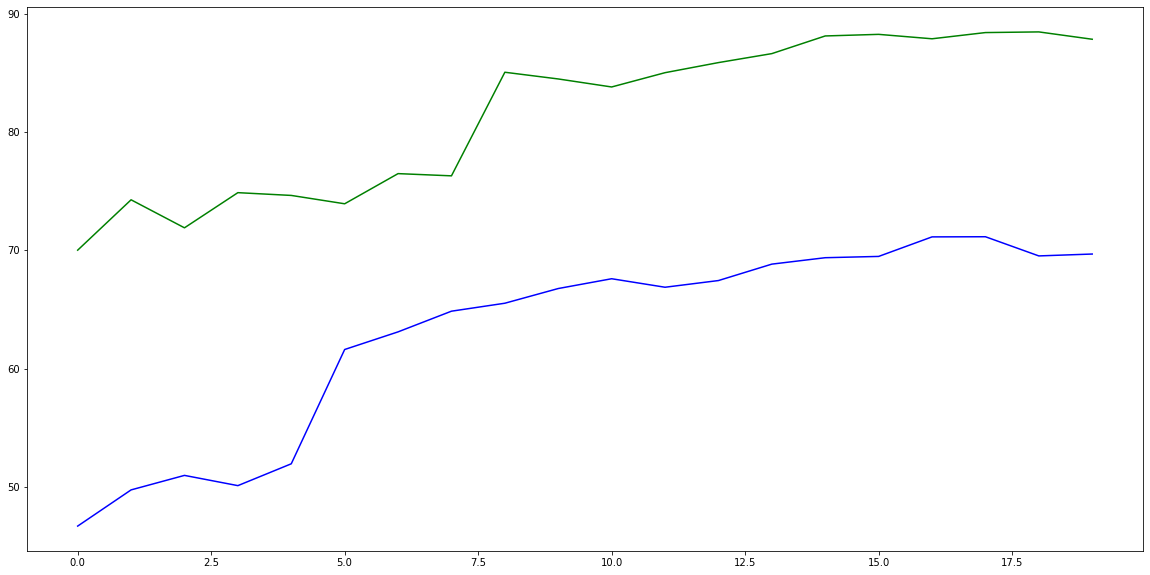

In [88]:
plt.figure(figsize = (20, 10))
plt.plot(np.std(results_data, axis = 0), "b")
plt.plot(np.std(reg_data, axis = 0), "g")

In [ ]:
"""
plotting threshold vs return
"""

In [122]:
results_return = []
results_threshold = []
for j in range(len(results)):
    for col_indx in range(1, 5):
        results_return.append(np.array(results[j][col_indx][3])[:,0])
        results_threshold.append(np.array(results[j][col_indx][3])[:,1])

In [123]:
results_return = np.reshape(results_return, (-1))

In [124]:
results_threshold = np.reshape(results_threshold, (-1))

In [125]:
for num in range(100, 250):
    try:
        splitted = np.split(np.argsort(results_threshold), num)
        print(num)
        break
        
    except:
        continue

128


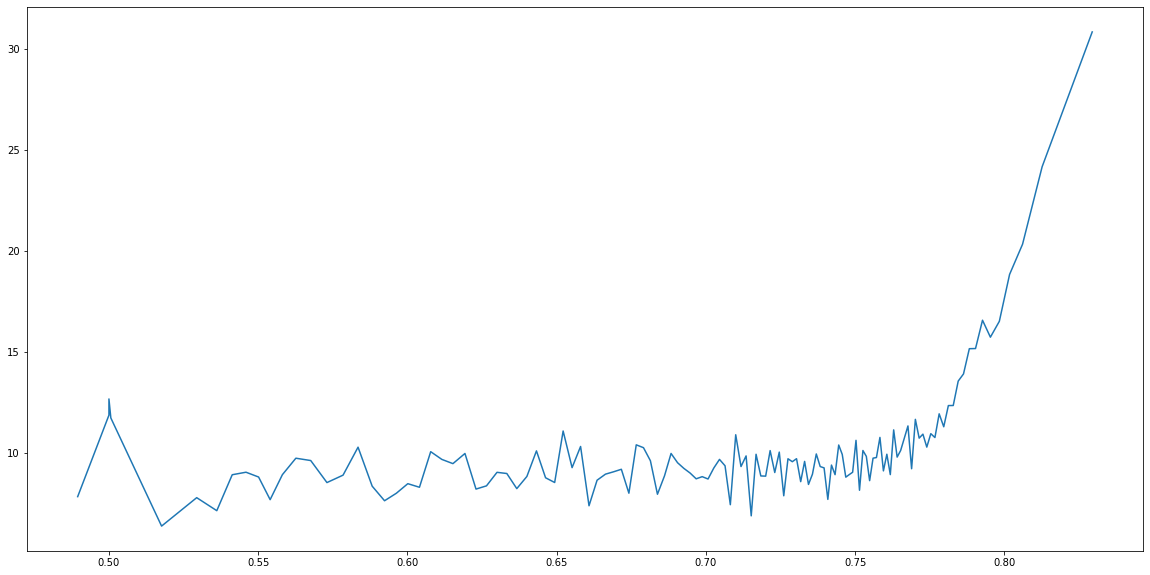

In [126]:
plt.figure(figsize = (20, 10))
num = 128
plt.plot([np.mean(results_threshold[splitted[i]]) for i in range(num)], [np.mean(results_return[splitted[i]]) for i in range(num)])


In [127]:
results_return = []
results_threshold = []
for j in range(len(results)):
    for col_indx in range(1, 5):
        results_return.append(np.array(results_reg[j][col_indx][3])[:,0])
        results_threshold.append(np.array(results_reg[j][col_indx][3])[:,1])

In [128]:
results_return = np.reshape(results_return, (-1))

In [129]:
results_threshold = np.reshape(results_threshold, (-1))

In [130]:
for num in range(100, 250):
    try:
        splitted = np.split(np.argsort(results_threshold), num)
        print(num)
        break
        
    except:
        continue

128


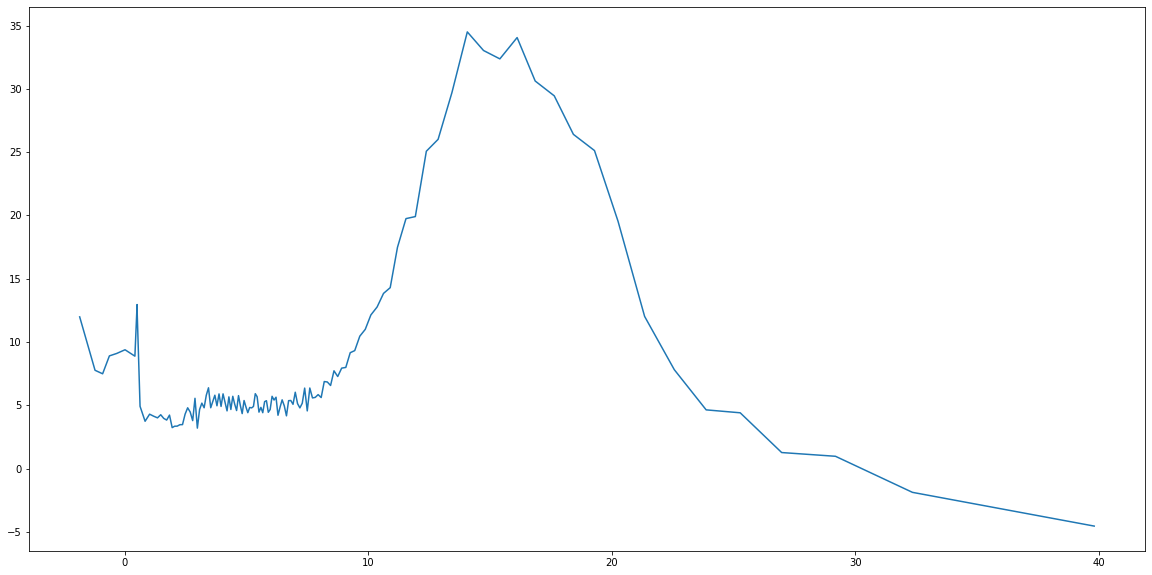

In [131]:
plt.figure(figsize = (20, 10))
num = 128
plt.plot([np.mean(results_threshold[splitted[i]]) for i in range(num)], [np.mean(results_return[splitted[i]]) for i in range(num)])

In [178]:
results_return = []
results_threshold = []
for j in range(len(results)):
    for col_indx in range(1, 5):
        results_return.append(np.array(results_reg[j][col_indx][3])[19,4])
        results_threshold.append(np.array(results_reg[j][col_indx][3])[19,5])

In [179]:
results_return = np.reshape(results_return, (-1))

In [180]:
results_threshold = np.reshape(results_threshold, (-1))

In [181]:
np.max(results_threshold)

1169.5947265625

In [182]:
for num in range(17, 250):
    try:
        splitted = np.split(np.argsort(results_threshold), num)
        print(num)
        break
        
    except:
        continue

32


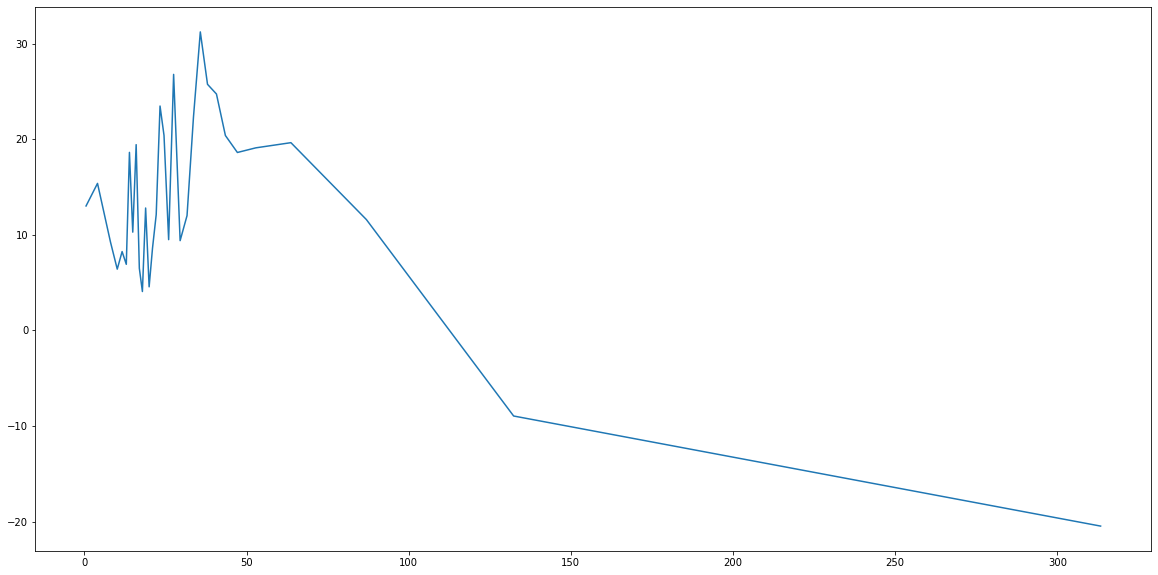

In [183]:
plt.figure(figsize = (20, 10))
plt.plot([np.mean(results_threshold[splitted[i]]) for i in range(num)], [np.mean(results_return[splitted[i]]) for i in range(num)])

In [177]:
results[0][1][1]

314643

In [272]:
results_return = []
results_len_train = []
results_len_test = []
for j in range(len(results)):
    for col_indx in range(1, 5):
        results_return.append(np.mean(np.array(results_reg[j][col_indx][3])[:,0]))
        results_len_train.append(results_reg[j][col_indx][1])
        results_len_test.append(results_reg[j][col_indx][2])

In [273]:
results_return = np.reshape(results_return, (-1))

In [274]:
results_len_train = np.reshape(results_len_train, (-1))

In [275]:
results_len_test = np.reshape(results_len_test, (-1))

In [276]:
for num in range(17, 250):
    try:
        splitted = np.split(np.argsort(results_len_train), num)
        print(num)
        break
        
    except:
        continue

32


In [277]:
for num in range(17, 250):
    try:
        splitted_test = np.split(np.argsort(results_len_test), num)
        print(num)
        break
        
    except:
        continue

32


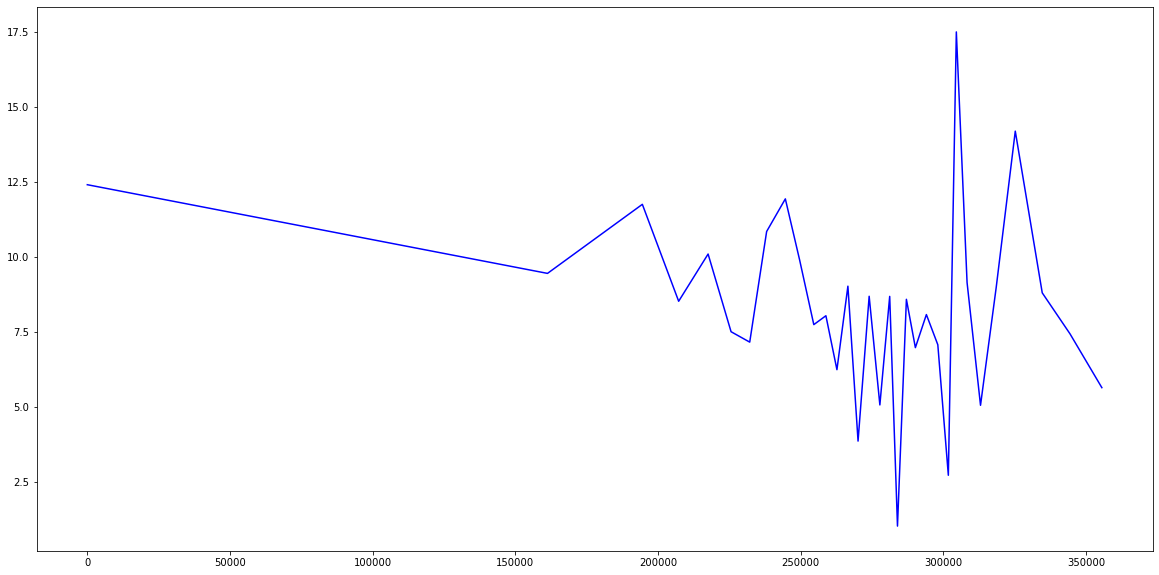

In [278]:
plt.figure(figsize = (20, 10))
plt.plot([np.mean(results_len_train[splitted[i]]) for i in range(num)], [np.mean(results_return[splitted[i]]) for i in range(num)], "b")




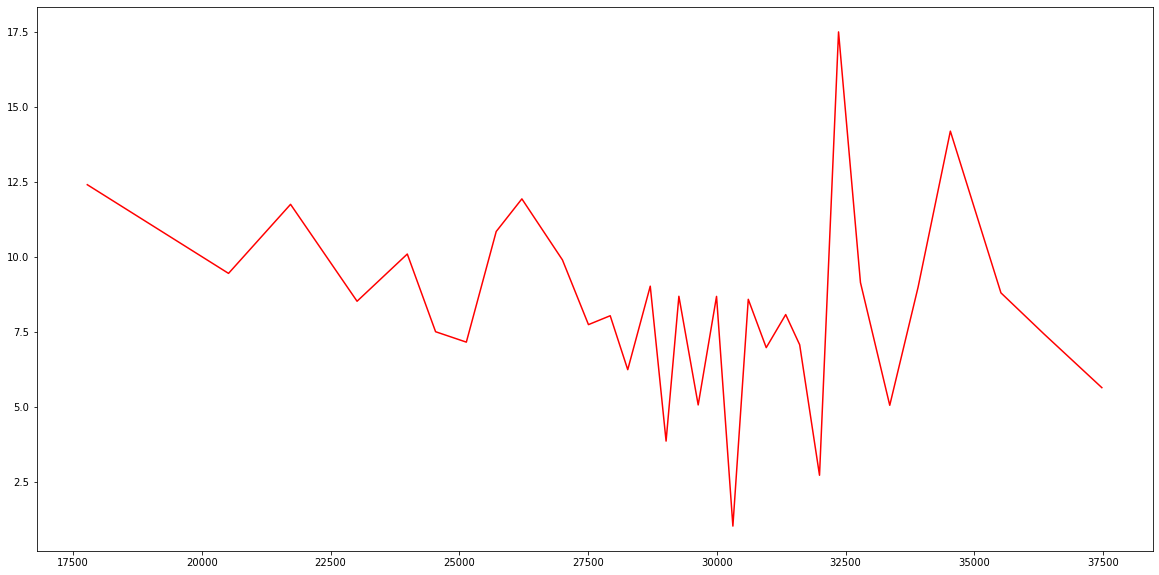

In [279]:
plt.figure(figsize = (20, 10))
plt.plot([np.mean(results_len_test[splitted_test[i]]) for i in range(num)], [np.mean(results_return[splitted[i]]) for i in range(num)], "r")

In [290]:
unique_dates = []
for i in range(len(results)):
    unique_dates.append(results[i][0])

In [291]:
unique_dates = np.unique(unique_dates)



In [323]:
b = {}

for i in unique_dates:
    b[i] = []
    
for i in range(len(results)):
    
    for col_indx in range(1, 5):
        
        b[results[i][0]].append(np.mean(np.array(results[i][col_indx][3])[:,4]))

In [324]:
test = []
for i in unique_dates:
    test.append(np.mean(b[i]))
    

(-80.0, 200.0)

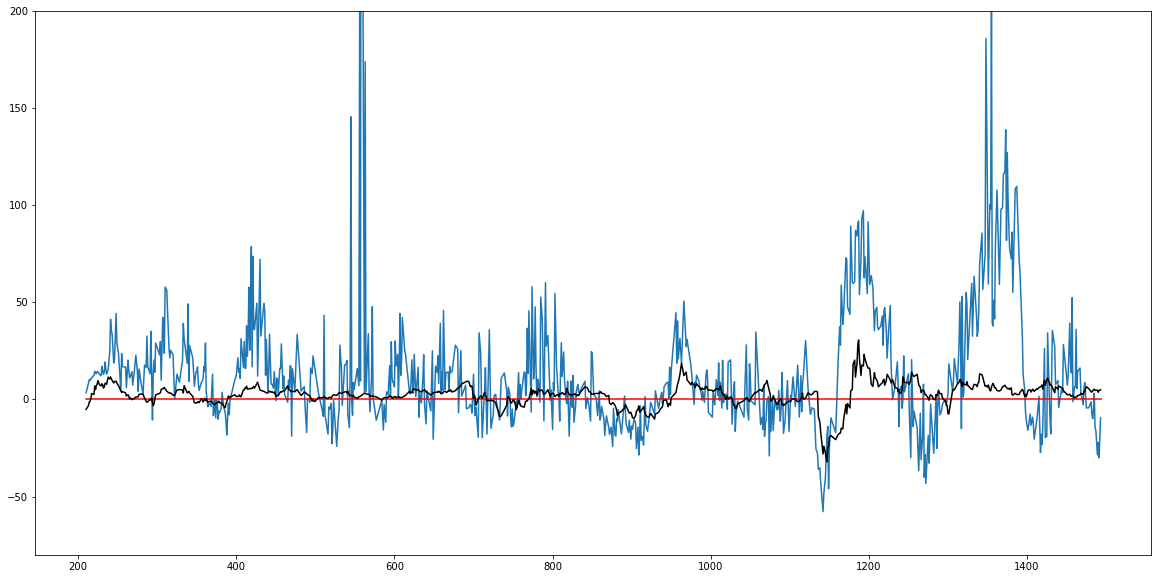

In [325]:
plt.figure(figsize = (20, 10))
plt.plot(unique_dates, test)
plt.plot(unique_dates, np.ones(len(unique_dates)) * 0, "r")
plt.plot(unique_dates, sp500.loc[Dates[unique_dates]]["return_40"], "black")
plt.ylim(-80, 200)

In [ ]:
"""
results vs col_size
"""

In [54]:
col_size_dict = {}
dataset = results_reg.copy()
for i in range(len(dataset)):
    for col_indx in range(1, 5):
        thing_to_append = np.mean(np.array(dataset[i][col_indx][3])[:,4])
        length = len(dataset[i][col_indx][0])
        try:
        
            col_size_dict[length].append(thing_to_append)
        except:
            col_size_dict[length] = [thing_to_append]
            

In [55]:
col_size_dict_results = {}
for key, data in col_size_dict.items():
    col_size_dict_results[key] = [np.mean(data), np.std(data), len(data)]

In [56]:
np.mean(np.array(list(col_size_dict_results.values()))[:,0][indx])

12.715510730983917

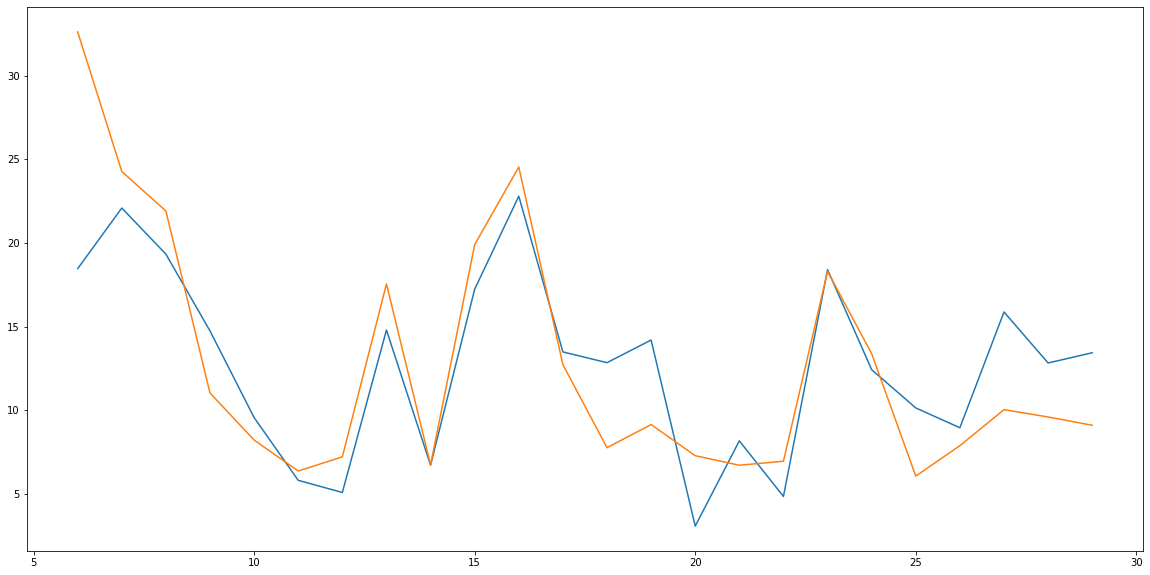

In [57]:
plt.figure(figsize = (20, 10))
indx = np.argsort(list(col_size_dict_results.keys()))
plt.plot(np.array(list(col_size_dict_results.keys()))[indx], np.array(list(col_size_dict_results.values()))[:,0][indx])
#plt.plot(np.array(list(col_size_dict_results.keys()))[indx] ,np.array(list(col_size_dict_results.values()))[:,2][indx]* 12 / np.mean(np.array(list(col_size_dict_results.values()))[:,2][indx]))
plt.plot(np.array(list(col_size_dict_results.keys()))[indx], np.array(list(col_size_dict_results.values()))[:,1][indx]  / np.mean(np.array(list(col_size_dict_results.values()))[:,1][indx]) * np.mean(np.array(list(col_size_dict_results.values()))[:,0][indx]))


In [ ]:
"""
0 is cols
1 is train len
2 is test len
3 is data (20 x 6) use [:,4] for 20 portfolio
4 is weight
5 is gain
6 is cover

"""

In [17]:
weight_dict = {}
gain_dict = {}
cover_dict = {}

dataset = results_reg.copy()


for i in range(len(dataset)):
    for col_indx in range(1, 5):
        
        for key, value in dataset[i][col_indx][4].items():
            try:
                
                weight_dict[key].append(value)
                
                
            except:
                
                weight_dict[key] = [value]
                
        for key, value in dataset[i][col_indx][5].items():
            try:
                
                gain_dict[key].append(value)
                
                
            except:
                
                gain_dict[key] = [value]
                
        for key, value in dataset[i][col_indx][6].items():
            try:
                
                cover_dict[key].append(value)
                
                
            except:
                
                cover_dict[key] = [value]


In [18]:
weight_dict_data = {}
gain_dict_data = {}
cover_dict_data = {}

for col_name, data in weight_dict.items():
    weight_dict_data[col_name] = [np.mean(data), np.std(data), len(data)]
    
for col_name, data in gain_dict.items():
    gain_dict_data[col_name] = [np.mean(data), np.std(data), len(data)]
    
for col_name, data in cover_dict.items():
    cover_dict_data[col_name] = [np.mean(data), np.std(data), len(data)]


In [ ]:
"""
we also want to see which columns performed the best using return on 20th boost
we also want to see which columns performed the best using mean_return
we also want to see which columns had the greatest mean increase in each boosting step
then we can compare the data

"""

In [34]:
results_dict_0 = {}
results_dict_20 = {}
results_dict_mean = {}
results_dict_growth = {}

dataset = results_reg.copy()
portfolio_indx = 0

for i in range(len(dataset)):
    for col_indx in range(1, 5):
        
        thing_to_append = dataset[i][col_indx][3][0][portfolio_indx]
        
        for col_name in dataset[i][col_indx][0]:
            try:
                results_dict_0[col_name].append(thing_to_append)
                
            except:
                results_dict_0[col_name] = [thing_to_append]
        
        thing_to_append = dataset[i][col_indx][3][-1][portfolio_indx]
        
        for col_name in dataset[i][col_indx][0]:
            try:
                results_dict_20[col_name].append(thing_to_append)
                
            except:
                results_dict_20[col_name] = [thing_to_append]
                
                
        thing_to_append = np.mean(np.array(dataset[i][col_indx][3])[:,portfolio_indx])
        
        for col_name in dataset[i][col_indx][0]:
            try:
                results_dict_mean[col_name].append(thing_to_append)
                
            except:
                results_dict_mean[col_name] = [thing_to_append]
                
                
        temp = np.array(dataset[i][col_indx][3])[:,portfolio_indx]
                     
        thing_to_append = np.mean([temp[i] - temp[i-1] for i in range(1, len(temp))])
        
        for col_name in dataset[i][col_indx][0]:
            try:
                results_dict_growth[col_name].append(thing_to_append)
                
            except:
                results_dict_growth[col_name] = [thing_to_append]
        
       

In [35]:
results_dict_0_data = {}
results_dict_20_data = {}
results_dict_mean_data = {}
results_dict_growth_data = {}


for col_name, data in results_dict_0.items():
    results_dict_0_data[col_name] = [np.mean(data), np.std(data), len(data)]

for col_name, data in results_dict_20.items():
    results_dict_20_data[col_name] = [np.mean(data), np.std(data), len(data)]
    

for col_name, data in results_dict_mean.items():
    results_dict_mean_data[col_name] = [np.mean(data), np.std(data), len(data)]
    
for col_name, data in results_dict_growth.items():
    results_dict_growth_data[col_name] = [np.mean(data), np.std(data), len(data)]


In [ ]:
"""
lets use the above data and get idk 60? cols to choose from

"""

In [264]:
datasets = [results_dict_0_data,
results_dict_20_data,
results_dict_mean_data,
results_dict_growth_data,
weight_dict_data,
gain_dict_data,
cover_dict_data]

In [170]:
results_dict_0_data_20 = results_dict_0_data.copy()
results_dict_20_data_20 = results_dict_20_data.copy()
results_dict_mean_data_20 = results_dict_mean_data.copy()
results_dict_growth_data_20 = results_dict_growth_data.copy()
weight_dict_data_20 = weight_dict_data.copy()
gain_dict_data_20 = gain_dict_data.copy()
cover_dict_data_20 = cover_dict_data.copy()

In [176]:
datasets_20 = [results_dict_0_data_20, results_dict_20_data_20, results_dict_mean_data_20, results_dict_growth_data_20, weight_dict_data_20, gain_dict_data_20, cover_dict_data_20]

In [195]:
thing = []
for dataset, dataset_20 in zip(datasets, datasets_20):
    
    indx = np.argsort(np.array(list(dataset.values()))[:,0])[::-1][:30]
    cols = np.array(list(dataset.keys()))[indx]
    
    indx_20 = np.argsort(np.array(list(dataset_20.values()))[:,0])[::-1][:30]
    cols_20 = np.array(list(dataset_20.keys()))[indx_20]
    
    thing.append(len(np.intersect1d(cols, cols_20)) / len(cols))
    


In [265]:
sim_matrix = []
for dataset in datasets:
    
    indx = np.argsort(np.array(list(dataset.values()))[:,0])[::-1][:30]
    cols = np.array(list(dataset.keys()))[indx]
    
    thing = []
    for dataset2 in datasets:
        
        
        indx2 = np.argsort(np.array(list(dataset2.values()))[:,0])[::-1][:30]
        cols2 = np.array(list(dataset2.keys()))[indx2]
        
        thing.append(len(np.intersect1d(cols, cols2)) / len(cols))
        
    sim_matrix.append(thing)


In [102]:
import seaborn as sns

In [267]:
test = ["0", "20", "mean", "growth", "weight", "gain", "cover"]

In [128]:
test_1 = []
for _ in range (10000):
    test_1.append(len(np.intersect1d([np.random.randint(0, 290) for i in range(30)], [np.random.randint(0, 290) for i in range(30)])))

In [129]:
np.mean(test_1) / 30

0.09283666666666666

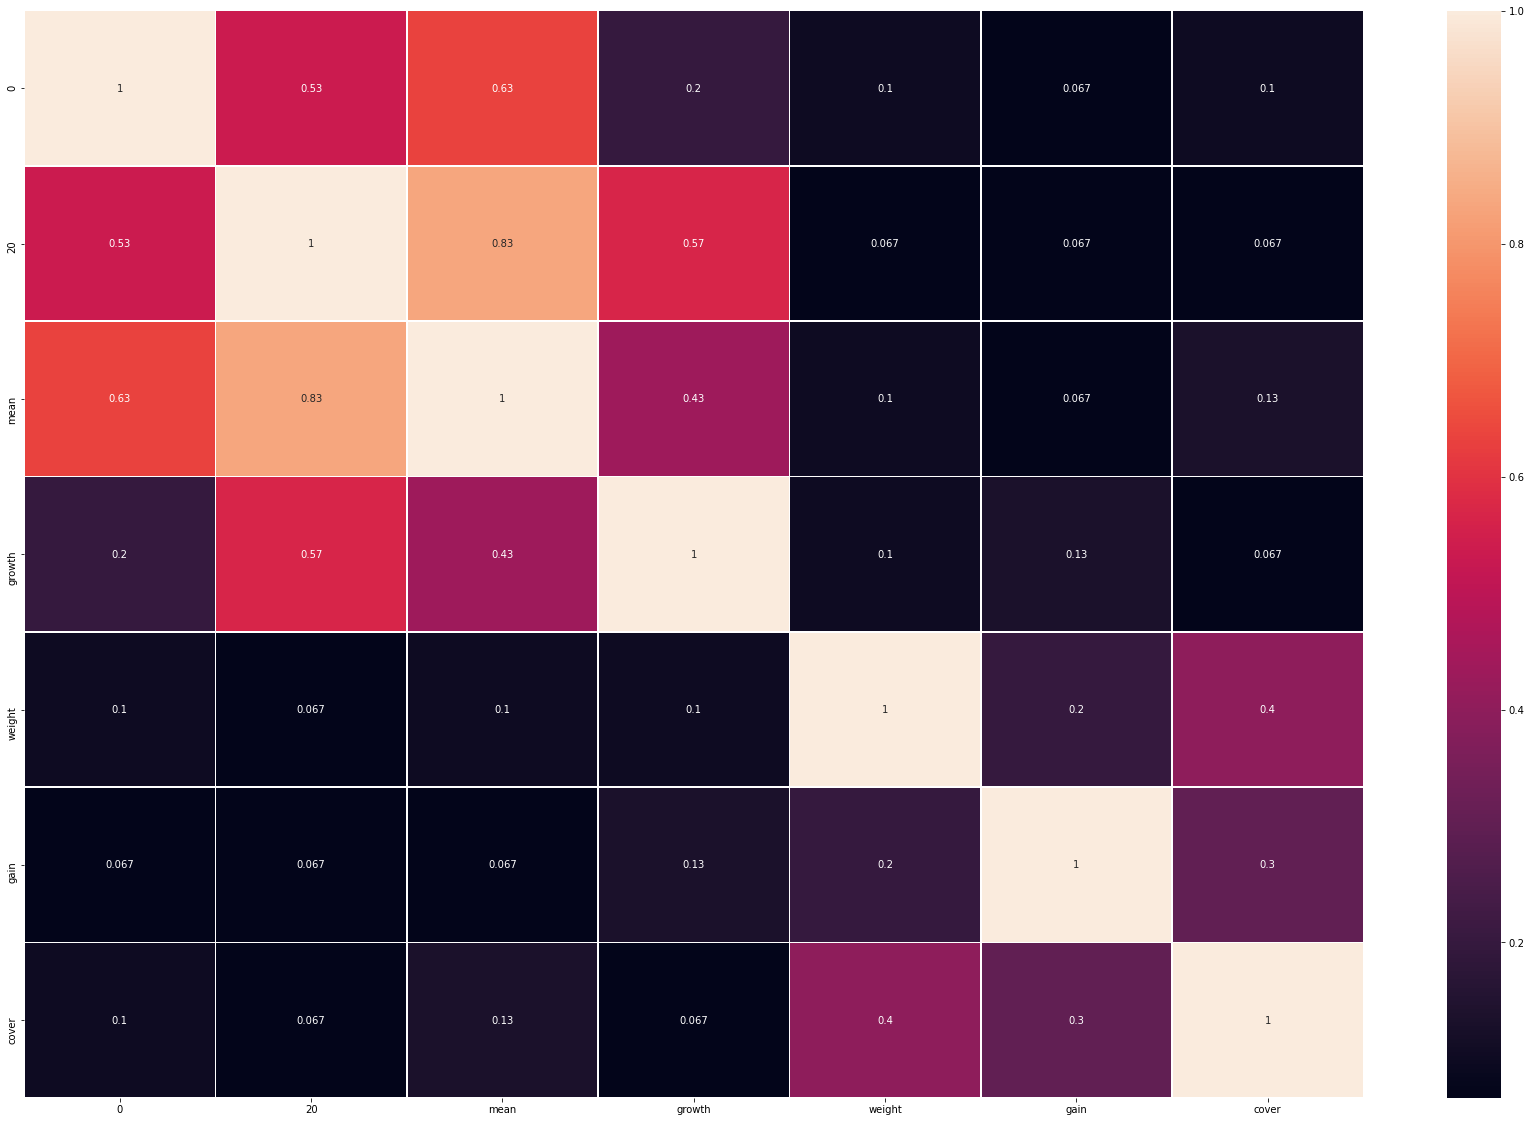

In [268]:
plt.figure(figsize = (30, 20))
ax = sns.heatmap(sim_matrix, linewidth=0.5, annot = True, xticklabels = test, yticklabels = test)
plt.show()

In [21]:
score_dict = {}
cols = np.unique(list(results_dict_20_data.keys()))
for i in cols:
    
    
    
    col_indx = np.where(np.array(list(weight_dict_data.keys())) == i)[0][0]
    score_dict[i] = np.where(np.argsort(np.array(list(weight_dict_data.values()))[:,0])[::-1] == col_indx)[0][0]
    
    col_indx = np.where(np.array(list(gain_dict_data.keys())) == i)[0][0]
    score_dict[i] += np.where(np.argsort(np.array(list(gain_dict_data.values()))[:,0])[::-1] == col_indx)[0][0]
    
    
    
    
    col_indx = np.where(np.array(list(cover_dict_data.keys())) == i)[0][0]
    score_dict[i] += np.where(np.argsort(np.array(list(cover_dict_data.values()))[:,0])[::-1] == col_indx)[0][0]


In [22]:
cols_metrics_20_reg = [list(score_dict.keys())[i] for i in np.argsort(list(score_dict.values()))][:50]

In [29]:
with open("ColSearch/cols_metrics_binary.pkl", "wb") as f:
    pickle.dump(cols_metrics_20_reg, f)

In [23]:
with open("ColSearch/cols_metrics_binary.pkl", "rb") as f:
    test1 = pickle.load(f)

In [28]:
np.unique(test1) == np.unique(cols_metrics_20_reg)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [30]:
cols = np.unique(list(results_dict_20_data.keys()))

In [36]:
score_dict = {}
for i in cols:
    
    
    col_indx = np.where(np.array(list(results_dict_20_data.keys())) == i)[0][0]
    
    
    score_dict[i] = np.where(np.argsort(np.array(list(results_dict_20_data.values()))[:,0])[::-1] == col_indx)[0][0]
    
    col_indx = np.where(np.array(list(results_dict_mean_data.keys())) == i)[0][0]
    score_dict[i] += np.where(np.argsort(np.array(list(results_dict_mean_data.values()))[:,0])[::-1] == col_indx)[0][0]
    
    
    col_indx = np.where(np.array(list(results_dict_growth_data.keys())) == i)[0][0]
    score_dict[i] += np.where(np.argsort(np.array(list(results_dict_growth_data.values()))[:,0])[::-1] == col_indx)[0][0]

In [37]:
cols_return_500_reg = [list(score_dict.keys())[i] for i in np.argsort(list(score_dict.values()))][:50]

In [12]:
len(cols_return_500_reg)

50

In [38]:
with open("ColSearch/cols_return_500_reg.pkl", "wb") as f:
    pickle.dump(cols_return_500_reg, f)

In [13]:
with open("ColSearch/cols_return_20_reg.pkl", "rb") as f:
    test1 = pickle.load(f)

In [ ]:
count = 0
results = []
results_reg = []
start_time = time.perf_counter()

while True:
    results1 = []
    results1_reg = []
    
    if time.perf_counter() - start_time > 3600:
        time.sleep(600)
        print("sleeping")
        start_time = time.perf_counter()
    
    count+=1
    print(str(count))
    prediction_date = np.random.randint(210, len(Dates) - 70)
    
    results1.append(prediction_date)
    results1_reg.append(prediction_date)
    
    training_period = Dates[prediction_date - 200 - 40 + 1: prediction_date - 40 +1]

    prediction_period = Dates[prediction_date :prediction_date + 20 + 1]
    
    
    cols_trials = []
    for i in range(8):
        cols_trials.append(np.random.choice(columns_to_choose_from, np.random.randint(6, 30), replace = False))
    
    
    start_time_train_og = time.perf_counter()
    
    
    for cols in cols_trials[:4]:
        
        results2 = []
        
        X_train, X_test, Y_train, Y_return_40 = make_dataset_eval_with_extra_return_40_term_from_periods(features2, training_period, prediction_period, cols, "Class_binary_40_20", "return_40")
        
        train_weights = Y_train.map({0:19, 1:1})

        xgtrain = xgboost.DMatrix(X_train.values, Y_train.values, feature_names = cols, weight = train_weights)
        
        xgtest = xgboost.DMatrix(X_test.values, feature_names = cols)
        
        data = []

        mycallback = my_callback(xgtest, Y_return_40, data)

        bst = xgboost.train(params1, xgtrain, num_boost_round = 20, verbose_eval = False, callbacks = [mycallback])
        
        results2.append(cols)
        results2.append(len(Y_train))
        results2.append(len(Y_return_40))
        results2.append(data)
        results2.append(bst.get_score(importance_type='weight'))
        results2.append(bst.get_score(importance_type='gain'))
        results2.append(bst.get_score(importance_type='cover'))
               
        results1.append(results2)
        
        
    print("first: " + str(time.perf_counter() - start_time_train_og ))
    
    
    
    start_time_train_og = time.perf_counter()
        

        
    for cols in cols_trials[4:]:
        
        results2 = []
        
        
        X_train, X_test, Y_train_return_40, Y_test_return_40 = make_dataset_eval_with_extra_return_40_term_from_periods_for_regression(features2, training_period, prediction_period, cols, "return_40")

        xgtrain = xgboost.DMatrix(X_train.values, Y_train_return_40.values, feature_names = cols)
        
        xgtest = xgboost.DMatrix(X_test.values, feature_names = cols)
        
        data = []

        mycallback = my_callback_regression(xgtest, Y_test_return_40, data)

        bst = xgboost.train(params2, xgtrain, num_boost_round = 20, verbose_eval = False, callbacks = [mycallback])
        
        results2.append(cols)
        results2.append(len(Y_train))
        results2.append(len(Y_return_40))
        results2.append(data)
        results2.append(bst.get_score(importance_type='weight'))
        results2.append(bst.get_score(importance_type='gain'))
        results2.append(bst.get_score(importance_type='cover'))
               
        results1_reg.append(results2)
        
    print("second: " + str(time.perf_counter() - start_time_train_og ))
        
    results.append(results1)   
    results_reg.append(results1_reg)
    
    
    if not count%8:
        with open("ColSearch/results.pkl", "wb") as f:            
            pickle.dump(results, f)
        with open("ColSearch/results_reg.pkl", "wb") as f:
            pickle.dump(results_reg, f)   
        
            

    
    
    

1
first: 19.448377800000003
second: 19.92853409999998
2
first: 18.777243499999997
second: 19.016668400000015
3
first: 19.476974599999977
second: 18.714007100000003
4
first: 19.594039500000008
second: 18.482372699999985
5
first: 20.050671099999988
second: 18.55377450000003
6
first: 20.530530499999998
second: 17.66602720000003
7
first: 18.953664500000002
second: 18.704629900000043
8
first: 19.55599550000005
second: 19.724993600000005
9
first: 5.1185742999999775
second: 4.9719617000000085
10
first: 18.93314670000001
second: 18.743592800000044
11
first: 19.382043299999964
second: 21.533212299999946
12
first: 18.771105899999952
second: 19.016869600000064
13
first: 19.183145399999944
second: 18.678204999999934
14
first: 18.451001399999996
second: 19.45944259999999
15
first: 18.788822400000072
second: 17.869818699999996
16
first: 17.69396669999992
second: 20.259547999999995
17
first: 19.25808649999999
second: 19.559620300000006
18
first: 19.180855300000076
second: 18.095253200000002
19
first:

In [85]:
test2 = []
for i in range(20):
    test2.append([1, 2, 3, 4, 5])

In [83]:
test.append(bst.get_score(importance_type='weight'))


In [88]:
test.append(cols)

In [79]:
test = []

In [78]:
import sys
from pympler.asizeof import asizeof

In [112]:
results[0][3]

[array(['Total Assets/Share Capital & Additional Paid-In Capital_QC',
        'Net Cash from Financing Activities/Cash & Cash Equivalents_YC',
        'Working Capital',
        'Operating Income (Loss)/Interest Expense, Net_YC',
        'Net Income_YC', 'ABAND_signal_80', 'ATR_40', 'close_20/Close_80',
        'Return on Equity_QC', 'Enterprise Value/EBITDA', 'ULTOSC_112',
        'Shares (Diluted)/Shares (Basic)_YC', 'EV/Sales',
        'Property, Plant & Equipment, Net/Total Cost', 'BOL_indicator_10',
        'Gross Profit_YC',
        'Total Current Liabilities/Total Liabilities_YC',
        'close_10/Close_20', 'RSI_112'], dtype=object),
 240157,
 26276,
 [(13.80788568650931,
   0.5354072749614716,
   3.969823693169335,
   0.5594621896743774,
   19.529475171075095,
   0.5694316029548645),
  (10.932965966933857,
   0.5700535476207733,
   4.155978327870043,
   0.6112987697124481,
   15.556896606584132,
   0.6238481998443604)],
 {'Total Assets/Share Capital & Additional Paid-In Capit